In [1]:
import os
from binance.client import Client
from dotenv import load_dotenv

from datetime import datetime, timedelta
from pandas_datareader import data as pdr
import pandas as pd
load_dotenv()

True

In [2]:
API_KEY = os.getenv('BINANCE_KEY')
API_SECRET = os.getenv('BINANCE_SECRET')

client = Client(API_KEY, API_SECRET)

### Hard-Limits:
* 1,200 request weight per minute (keep in mind that this is not necessarily the same as 1,200 requests)
* 50 orders per 10 seconds
* 160,000 orders per 24 hours

### Time interval
*     KLINE_INTERVAL_1MINUTE = '1m'
*     KLINE_INTERVAL_3MINUTE = '3m'
*     KLINE_INTERVAL_5MINUTE = '5m'
*     KLINE_INTERVAL_15MINUTE = '15m'
*     KLINE_INTERVAL_30MINUTE = '30m'
*     KLINE_INTERVAL_1HOUR = '1h'
*     KLINE_INTERVAL_2HOUR = '2h'
*     KLINE_INTERVAL_4HOUR = '4h'
*     KLINE_INTERVAL_6HOUR = '6h'
*     KLINE_INTERVAL_8HOUR = '8h'
*     KLINE_INTERVAL_12HOUR = '12h'
*     KLINE_INTERVAL_1DAY = '1d'
*     KLINE_INTERVAL_3DAY = '3d'
*     KLINE_INTERVAL_1WEEK = '1w'
*     KLINE_INTERVAL_1MONTH = '1M'

In [3]:
def ImportBinance(name, symbol, start_time="1 Jan,2018", end_time="1 Jan,2020", interval_time=Client.KLINE_INTERVAL_1HOUR):
    klines = client.get_historical_klines(symbol, interval_time, start_time, end_time)
    df = pd.DataFrame(klines)
    # create colums name
    df.columns = ['timestamp','open', 'high', 'low', 'close', 'volume', 'close_time', 
                  'qav','num_trades','taker_base_vol','taker_quote_vol', 'ignore']
            
    # change the timestamp
    df.index = [datetime.fromtimestamp(x/1000.0) for x in df.close_time]
    df.to_csv(f"{name}.csv", index = None, header=True)
    print(f"{symbol} ==> {name} done...")

In [7]:
tf_list = [
    Client.KLINE_INTERVAL_15MINUTE, 
    Client.KLINE_INTERVAL_30MINUTE, 
    Client.KLINE_INTERVAL_1HOUR, 
    Client.KLINE_INTERVAL_4HOUR, 
    Client.KLINE_INTERVAL_1DAY
]
symbol_list =  ['GALAUSDT', 'BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'ADAUSDT', 'SHIBUSDT']
# [ 'UNIUSDT', 'CAKEUSDT', 'SOLUSDT', 'LUNAUSDT', 'DOTUSDT']
              
start = "1 Jan,2018"
end = "23 Mar,2022"

for symbol in symbol_list:
    t_now = datetime.today().strftime('%Y_%m_%d')
    for tf in tf_list:
        print(f"{symbol} tf: {tf} in process...")
        ImportBinance(f"{symbol}_{tf}_{t_now}", symbol, start, end, tf)

GALAUSDT tf: 15m in process...
GALAUSDT ==> GALAUSDT_15m_2022_03_23 done...
GALAUSDT tf: 30m in process...
GALAUSDT ==> GALAUSDT_30m_2022_03_23 done...
GALAUSDT tf: 1h in process...
GALAUSDT ==> GALAUSDT_1h_2022_03_23 done...
GALAUSDT tf: 4h in process...
GALAUSDT ==> GALAUSDT_4h_2022_03_23 done...
GALAUSDT tf: 1d in process...
GALAUSDT ==> GALAUSDT_1d_2022_03_23 done...
BTCUSDT tf: 15m in process...
BTCUSDT ==> BTCUSDT_15m_2022_03_23 done...
BTCUSDT tf: 30m in process...
BTCUSDT ==> BTCUSDT_30m_2022_03_23 done...
BTCUSDT tf: 1h in process...
BTCUSDT ==> BTCUSDT_1h_2022_03_23 done...
BTCUSDT tf: 4h in process...
BTCUSDT ==> BTCUSDT_4h_2022_03_23 done...
BTCUSDT tf: 1d in process...
BTCUSDT ==> BTCUSDT_1d_2022_03_23 done...
ETHUSDT tf: 15m in process...
ETHUSDT ==> ETHUSDT_15m_2022_03_23 done...
ETHUSDT tf: 30m in process...
ETHUSDT ==> ETHUSDT_30m_2022_03_23 done...
ETHUSDT tf: 1h in process...
ETHUSDT ==> ETHUSDT_1h_2022_03_23 done...
ETHUSDT tf: 4h in process...
ETHUSDT ==> ETHUSDT_4

### === test code below ===

In [15]:
btc_price = client.get_symbol_ticker(symbol="BTCUSDT")
# print full output (dictionary)
print(btc_price)
timestamp = client._get_earliest_valid_timestamp('BTCUSDT', '1h')
bars = client.get_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_30MINUTE)

# [0] Open time
# [1] Open NAV price
# [2] Highest NAV price
# [3] Lowest NAV price
# [4] Close (or the latest) NAV price
with open('btc_bars.csv', 'w') as d:
    for line in bars:
        d.write(f'{line[0]}, {line[1]}, {line[2]}, {line[3]}, {line[4]}\n')


{'symbol': 'BTCUSDT', 'price': '47135.38000000'}


In [8]:
symbol = "DOTUSDT"
interval='15m'
Client.KLINE_INTERVAL_15MINUTE 
klines = client.get_historical_klines(symbol, interval, "1 Jan,2018")
data = pd.DataFrame(klines)
 # create colums name
data.columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol','taker_quote_vol', 'ignore']
            
# change the timestamp
data.index = [datetime.fromtimestamp(x/1000.0) for x in data.close_time]
data.to_csv(symbol+'.csv', index = None, header=True)

NameError: name 'df' is not defined

<AxesSubplot:title={'center':'DOTUSDT'}>

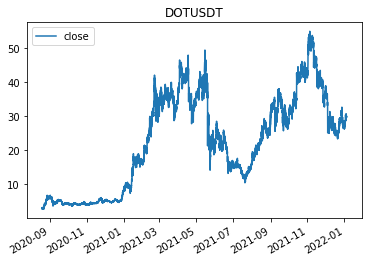

In [9]:
#convert data to float and plot
df=data.astype(float)
df["close"].plot(title = 'DOTUSDT', legend = 'close')

In [14]:
ImportBinance(f"test_test_test", "ETHUSDT", "1 Jan,2020", "1 Feb,2020", Client.KLINE_INTERVAL_1DAY)

ETHUSDT ==> test_test_test done...
